In [4]:
import matplotlib.pyplot as plt

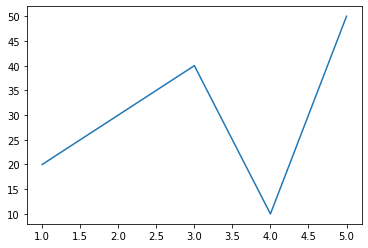

In [5]:
x = [1,2,3,4,5]
y = [20, 30, 40, 10, 50]
plt.plot(x, y); # if we don't use semicolon, there will be an empty array sign '[]' above the figure

### Recommended Way of Plotting

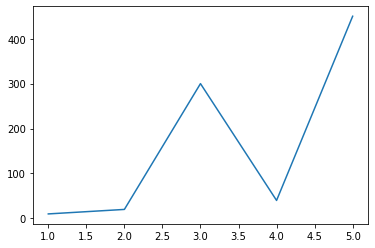

In [6]:
# Objext Oriented API
fig, ax = plt.subplots()
ax.plot(x, [10, 20, 300, 40, 450]);

## Matplotlib Workflow

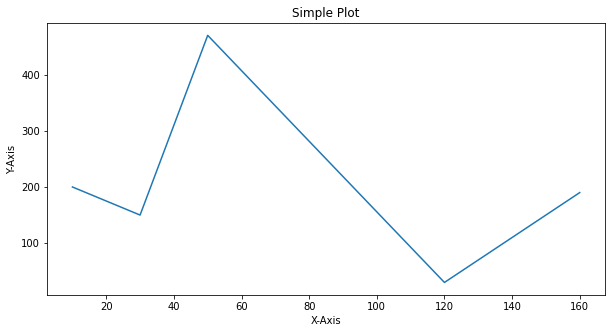

In [8]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Prepare Data
x = [10, 30, 50, 120, 160]
y = [200, 150, 470, 30, 190]

# Setup Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Customize Plot
ax.set(title="Simple Plot",
       xlabel="X-Axis",
       ylabel="Y-Axis")

# Plot Data
ax.plot(x, y);

## Plotting With NumPy Arrays
- Line Plot
- Scatter Plot
- Bar Plot
- Histogram
- Subplots

In [14]:
import numpy as np

In [17]:
x = np.linspace(0, 10, 100) # generate 100 evenly distributed numbers ranged from 0 to 10

### Line Plot

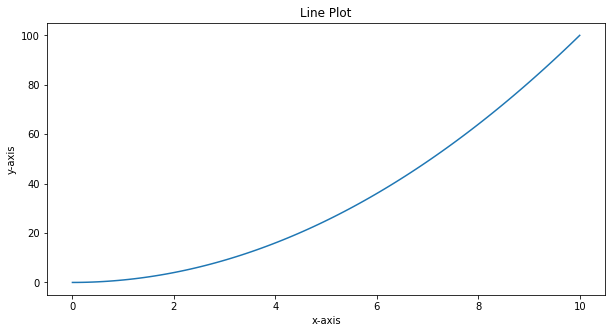

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="Line Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.plot(x, x**2); # by default plot = line plot

### Scatter Plot

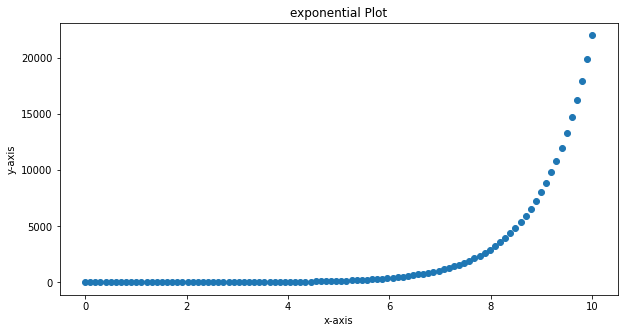

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="exponential Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.scatter(x, np.exp(x));

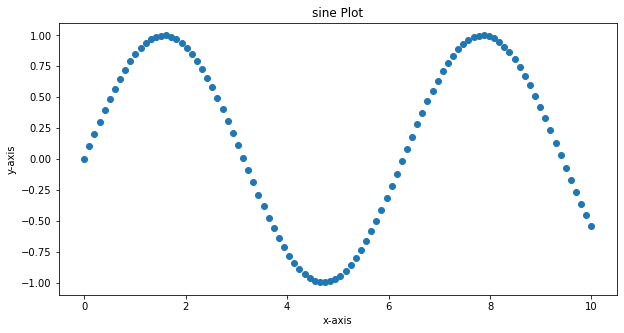

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set(title="sine Plot",
       xlabel="x-axis",
       ylabel="y-axis")

ax.scatter(x, np.sin(x)); # scatter

### Bar Plot

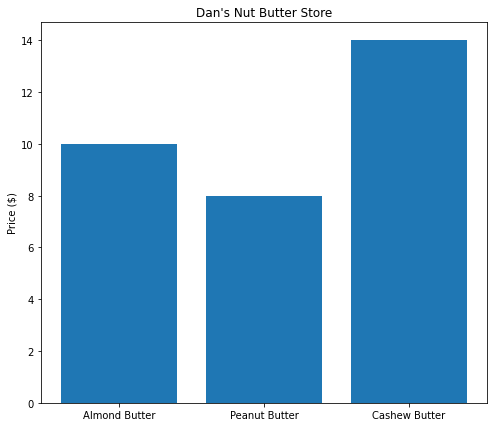

In [30]:
nut_butter_prices = {"Almond Butter": 10,
                     "Peanut Butter": 8,
                     "Cashew Butter": 14}

fig, ax = plt.subplots(figsize=(8, 7))

ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)")

ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values()); # bar